## Setup

In [11]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import numpy as np
import  matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal, norm
from scipy.stats import norm
import scipy
from sklearn.gaussian_process.kernels import RBF

rng = np.random.default_rng(12345)

## Revisiting Numpy

Last time, we looked at things numpy matrix and slicing and indexing.

Do you remember slicing? Indexing?

Lets look at taking the mean and sum of an array


### Task 1:

Use `rng.random()` function to generate a array that has 5 rows and n columns and calculate the mean of

1. The whole array
2. Mean of the columns
3. Mean of the rows


In [13]:
n = 4
x = rng.random((10,4))

x

array([[0.22733602, 0.31675834, 0.79736546, 0.67625467],
       [0.39110955, 0.33281393, 0.59830875, 0.18673419],
       [0.67275604, 0.94180287, 0.24824571, 0.94888115],
       [0.66723745, 0.09589794, 0.44183967, 0.88647992],
       [0.6974535 , 0.32647286, 0.73392816, 0.22013496],
       [0.08159457, 0.1598956 , 0.34010018, 0.46519315],
       [0.26642103, 0.8157764 , 0.19329439, 0.12946908],
       [0.09166475, 0.59856801, 0.8547419 , 0.60162124],
       [0.93198836, 0.72478136, 0.86055132, 0.9293378 ],
       [0.54618601, 0.93767296, 0.49498794, 0.27377318]])

In [14]:
out_1 = np.mean(x)
out_2 = np.mean(x, axis = 0)
out_3 = np.mean(x, axis = 1)

print(out_1)
print(out_2)
print(out_3)

0.517635759750854
[0.45737473 0.52504403 0.55633635 0.53178793]
[0.50442862 0.3772416  0.70292144 0.52286374 0.49449737 0.26169588
 0.35124022 0.53664898 0.86166471 0.56315502]



### Task 2:


Use `sample()` function to generate a array that has 100 rows and 1 column, and output $$f(x) = \Sigma_{i=0}^{d} x_i^2$$

Think:

1. Inputs? An array
2. Outputs? An array
3. Can I write a code more generally for "n" dimensions instead of 1?

Code:




### Task 3:


Plot the one dimensional case above.

Think:

1. Which function to use?

Code:

## Motivation

So we are given the following points.

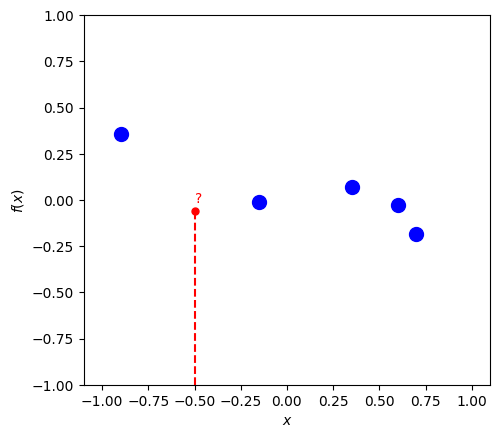

In [15]:
f = lambda x :(1-(3*x**2))*np.sin(np.pi*x) *x**2

x_orig = np.linspace(-1,1,50)
y_orig = f(x_orig)

x = np.array([-0.9,-0.15,0.35, 0.6, 0.7])
y = f(x)

question_pt = -0.5
fig, ax = plt.subplots()

ax.plot(x,y,".b", ms = 20)
ax.vlines(question_pt, -1, f(question_pt), linestyle="--", color = "r")
ax.plot(question_pt, f(question_pt),"r.", ms = 10)
ax.text(question_pt, f(question_pt)+0.05, '?', style='normal', color = "r")

ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1,1)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x)$")
ax.set_aspect("equal")

plt.savefig("initial.png", dpi = 200)


1. Can we predict the value and also provide uncertainty estimates?
2. Can we do this with using plain old Gaussian?

## Let's enter the Gaussian World


### Univariate Normal Distribution

*   A random variable X is normally distributed with mean $\mu$ and variance $\sigma^2$ if it has the probability density function of X as:
$$ f(x) = \frac{1}{\sqrt{2 \pi} \sigma} exp{\left(-\frac{{\left(x - \mu \right)}^{2}}{2 \sigma^{2}}\right)}$$

*   In this expression, you see the squared difference between the variable $x$ and its mean, $\mu$.
*   This value will be minimized when $x$ is equal to $\mu$.
*   The quantity $-\frac{{x-\mu}^2}{\sigma^2}$ will take its largest value when $x$ is equal to $\mu$ or likewise since the exponential function is a monotone function, the normal density takes a maximum value when $x$ is equal to $\mu$.
*   The variance $\sigma^2$ defines the spread of the distribution about that maximum. If it is large, then the spread is going to be large, otherwise, if the value is small, then the spread will be small.




If $X$ is random variable that follows a normal distribution with mean $\mu$ and variance $\sigma^2$, then we will denote it as $X \sim \mathcal{N}(\mu, \sigma^2)$.    

    
If you are not familiar, play around with this link: https://demonstrations.wolfram.com/TheNormalDistribution/


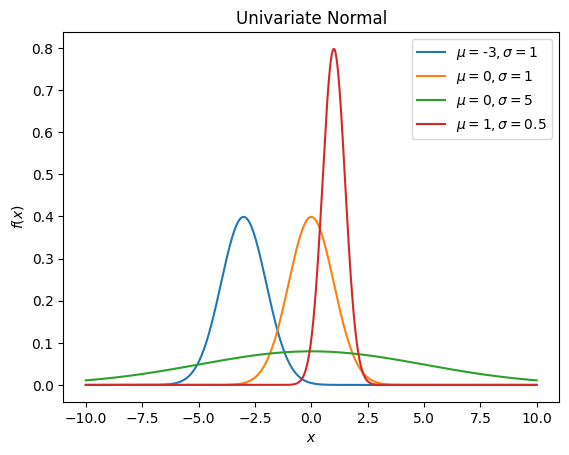

In [16]:
def univariate_density(x, mu, sigma):
    return (2*np.pi*sigma**2)**(-.5) * np.exp(-.5* ((x - mu)/sigma)**2)


x_vals = np.linspace(-10,10, 1000)                          #generate 1000 evenly placed values of x from -10 to 10
params = [(-3,1), (0, 1), (0,5), (1,.5)]                    #Different mean and std dev of gaussian we want to consider
#plot the density for differnet mean and std dev
for mu, sigma in params:
    p_vals = univariate_density(x_vals, mu, sigma)
    plt.plot(x_vals, p_vals, label=r"$\mu=$"+str(mu)+r"$, \sigma=$"+str(sigma))

plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.legend()
plt.title(r"Univariate Normal")
plt.show()

### The Multivariate Case


The multivariate normal distribution of a k-dimensional random vector  $\mathbf{X} = (X_1, X_2, ..., X_k)^{T}$ is written as $\mathbf{X} \sim \mathcal{N}(\mathbf{\mu}, \Sigma)$.
The probability density function is given as follows:
  $$f(\mathbf{x}) = \frac{1}{{(2\pi)^{k/2}|\Sigma|^{1/2}}}\exp\left(-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})\right)$$
  
where, $\mathbf{\mu} = E[\mathbf{X}] = (E[X_1], E[X_2], ..., E[X_k])^{T}$ and $\Sigma_{i,j} = E[(X_i-\mu_i)(X_j-\mu_j)] = Cov[X_i, X_j]$
    

  
*Fun fact: correctly constructed covariance matrices are always symmetric and positive semi-definite. And thus invertible.*

Let us look at the covariance matrix in detail:
$\Sigma_{i,j} = E[(X_i-\mu_i)(X_j-\mu_j)] = Cov[X_i, X_j]$


$$
    \Sigma_{k\times k} = \begin{bmatrix}
        \sigma_1^2          & cov(x_1, x_2)^2       & \ldots    & cov(x_1, x_{k-1})    & cov(x_1, x_k) \\
        cov(x_2, x_1)^2     & \sigma_2^2            & \ldots    & cov(x_2, x_{k-1})    & cov(x_2, x_k) \\
        \vdots              & \vdots                & \ddots    & \vdots                & \vdots \\
        cov(x_{k-1}, x_1)^2 & cov(x_{k-1}, x_2)^2   & \ldots    & \sigma_{k-1}^2        & cov(x_{k-1}, x_k)^2\\
        cov(x_k, x_1)^2     & cov(x_k, x_2)^2       & \ldots    & cov(x_k, x_{k-1})^2   & \sigma_k^2\\
    \end{bmatrix}
$$

The diagonal elements of the matrix contain the variances of the variables.

The off-diagonal elements contain the covariance between all possible pairs of variables.

    
Let us look at a bivariate Gaussian Distribution for different values of the covariance matrix.

In [17]:
def generate_matrices_for_2d_contours(mean, sigma, num_points, rng):
    # Sample points from the distribution. Using linearly spaced points makes the plot cleaner, but you could try sampling from a normal distribution
    y1 =  np.linspace(mean[0] + (-3*sigma[0,0]), mean[0] + (3*sigma[0,0]), num = num_points)
    y2 =  np.linspace(mean[1] + (-3*sigma[1,1]), mean[1] + (3*sigma[1,1]), num = num_points)
    Y1, Y2 = np.meshgrid(y1, y2)

    Y = np.vstack([Y1.reshape(-1), Y2.reshape(-1)])

    # Get the PDF value for samples
    multivariate_pdf = np.array([multivariate_normal.pdf(y, cov=sigma, mean=mean) for y in Y.T])
    multivariate_pdf_reshaped = multivariate_pdf.reshape(num_points, num_points)

    return Y1, Y2, multivariate_pdf_reshaped

In [18]:
def plot_2d_contours(Y1, Y2, p):
  # Plotter Function
    fig = plt.figure()
    ax = fig.add_subplot()

    ax.contourf(Y1, Y2, p, cmap='viridis')
    ax.set_aspect("equal")
    ax.set_xlim(Y1.min(), Y1.max())
    ax.set_ylim(Y2.min(), Y2.max())
    ax.set_xlabel(r"$X_1$")
    ax.set_ylabel(r"$X_2$")
    plt.show()

Define the Mean and Covariaince matrix.

Feel free to play around.

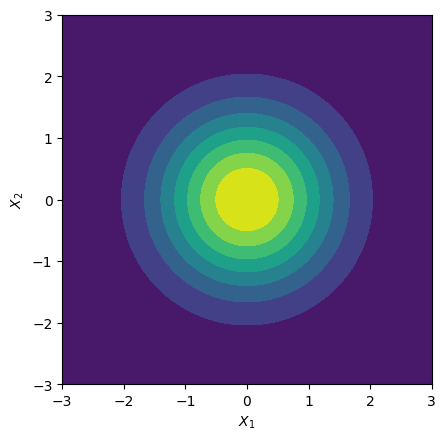

In [19]:
mean = [0,0]
sigma = np.array([[1,0], [0, 1]])
X1, X2, p = generate_matrices_for_2d_contours(mean, sigma = sigma, num_points = 100, rng = rng)
plot_2d_contours(X1, X2, p)

## Marginalization

Given a multivariate distribution, can we compute the pdf of a single variable? - Yes

$f(X_1) = \int{f(X_1, X_2) dX_2}$


Every random variables $X_i \in \mathbf{X}$ has the following distribution: $X_i \sim \mathcal{N}(\mu_i, \Sigma_{i,i})$

Feel free to play around with mean and covariance.


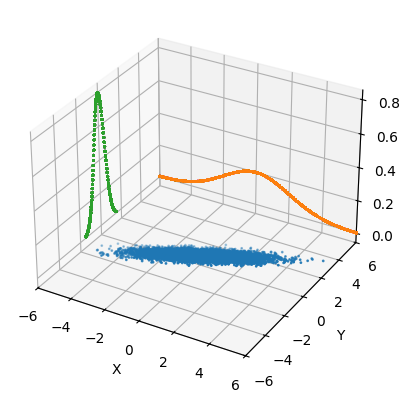

In [20]:
mean = [0,0]
sigma = np.array([[2,0.9], [0.9, 0.5]])

num_points = 100

mvn_object = multivariate_normal(cov=sigma, mean=[0, 0])
y_plot = mvn_object.rvs(num_points**2)
y1_plot = y_plot[:,0]
y2_plot = y_plot[:,1]

y1 =  np.linspace(mean[0] + (-3*sigma[0,0]), mean[0] + (3*sigma[0,0]), num = num_points)
y2 =  np.linspace(mean[1] + (-3*sigma[1,1]), mean[1] + (3*sigma[1,1]), num = num_points)
Y1, Y2 = np.meshgrid(y1, y2)

Y = np.vstack([Y1.reshape(-1), Y2.reshape(-1)])

pdf_y1 = np.array([norm.pdf(y, scale=sigma[0,0], loc=mean[0]) for y in Y[0,:]])
pdf_y1_reshaped = pdf_y1.reshape(num_points, num_points)

pdf_y2 = np.array([norm.pdf(y, scale=sigma[1,1], loc=mean[1]) for y in Y[1,:]])
pdf_y2_reshaped = pdf_y2.reshape(num_points, num_points)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(y1_plot, y2_plot, np.zeros(y2_plot.shape), s=1)
ax.scatter(Y1, 6*np.ones((num_points, num_points)), pdf_y1_reshaped, s=1)
ax.scatter(-6*np.ones((num_points, num_points)), Y2, pdf_y2_reshaped, s=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
plt.show()


## Conditioning

If some random variables from the set were fixed, what is the PDF? \\

Or formally, $f(X_i|X_j=x) = ?$

In fact, it is a Gaussian. Or formally, $X_i|(X_j=x) \sim \mathcal{N}(\mu_{*}, \Sigma_{*})$.

In a bivariate case, $f(X_2|X_1=x_1) \propto \exp(-\frac{1}{2}(x_2-\mu_{*})\Sigma_{*}^{-1}(x_2-\mu_{*}))$.

We will see what $\mu_{*}$ and $\Sigma_{*}$ looks like in a few slides.

In [21]:
def plot_3d_contours(Y1, Y2, p):
    # Function to generate 3d plots for conditioning
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(Y1, Y2, p, rstride=2, cstride=2, alpha=0.4, cmap=cm.coolwarm)

    x1_cut = 0.8
    x2_p = np.linspace(-3.1, 3.1, 100)
    z_p = np.linspace(0, p.max()*0.8, 100)
    X2_p, Z_p = np.meshgrid(x2_p, z_p)

    ax.plot_surface(x1_cut, X2_p, Z_p, color='silver', alpha=0.5, zorder=5)

    ax.set_xlabel(R'$X_1$', fontsize=14)
    ax.set_ylabel(R'$X_2$', fontsize=14)

    ax.axes.zaxis.set_ticks([])


    tol = 1e-4
    idx_x_p = (np.where(Y2 < x1_cut+tol) and np.where(Y2 > x1_cut-tol))[0][0]

    x1_c, x2_c, z_c = Y2[idx_x_p], Y1[idx_x_p], p[idx_x_p]

    ax.plot(x1_c, x2_c, z_c, zorder=10)

    plt.show()

Feel free to play around with the mean and the covariance function.

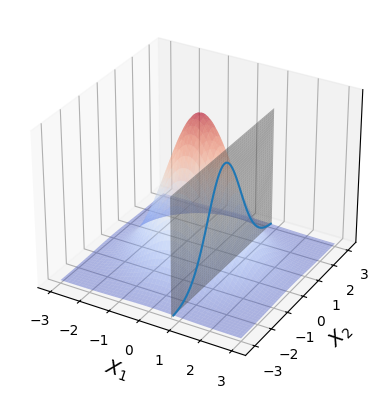

In [22]:
mean = [0,0]
sigma = np.array([[1,0.0], [0.0, 1]])

Y1, Y2, p = generate_matrices_for_2d_contours(mean, sigma = sigma, num_points = 100, rng = rng)
plot_3d_contours(Y1, Y2, p)

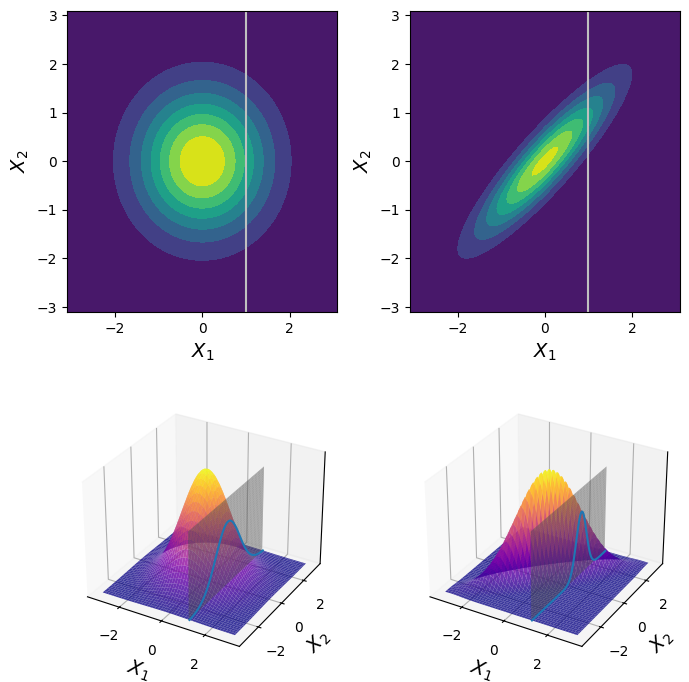

In [23]:
def plot_pdf(fig, subplot, X1, X2, cov):

    # 2X2 covariance matrix for the bivariate Gaussian distribution
    cov_matrix = np.array([[1, cov], [cov, 1]])
    distr = multivariate_normal(cov=cov_matrix, mean=[0, 0], seed=12345)
    # generate PDF of the multivariate Gaussian distribution
    pdf = np.zeros(X1.shape)
    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            pdf[i,j] = distr.pdf([X1[i,j], X2[i,j]])

    x1_cut = 1

    ax_contour = fig.add_subplot(subplot)
    ax_contour.contourf(X1, X2, pdf)
    ax_contour.plot([x1_cut, x1_cut], [-3.1, 3.1], color='silver')
    ax_contour.set_xlabel(R'$X_1$', fontsize=14)
    ax_contour.set_ylabel(R'$X_2$', fontsize=14)


    ax_pdf = fig.add_subplot(subplot+2, projection = '3d')
    ax_pdf.plot_surface(X1, X2, pdf, cmap='plasma', alpha=0.8, zorder=0)

    # create plane

    x2_p = np.linspace(-3.1, 3.1, 100)
    z_p = np.linspace(0, pdf.max()*0.8, 100)
    X2_p, Z_p = np.meshgrid(x2_p, z_p)
    # plot plane
    ax_pdf.plot_surface(x1_cut, X2_p, Z_p, color='silver', alpha=0.5, zorder=5)

    ax_pdf.set_xlabel(R'$X_1$', fontsize=14)
    ax_pdf.set_ylabel(R'$X_2$', fontsize=14)
    ax_pdf.axes.zaxis.set_ticks([])

    # find the closest idx values of X mesh to x1_cut
    tol = 1e-4
    idx_x_p = (np.where(X2 < x1_cut+tol) and np.where(X2 > x1_cut-tol))[0][0]
    # Select the corresponding values of X, Y, Z (carefully switch X and Y)
    x1_c, x2_c, z_c = X2[idx_x_p], X1[idx_x_p], pdf[idx_x_p]
    # plot line
    ax_pdf.plot(x1_c, x2_c, z_c, zorder=10)

fig = plt.figure(figsize=(7,7))

X1, X2 = np.meshgrid(np.linspace(-3.1, 3.1, num=100),
                     np.linspace(-3.1, 3.1, num=100))

plot_pdf(fig, 221, X1, X2, cov=0)
plot_pdf(fig, 222, X1, X2, cov=0.9)

plt.tight_layout()
plt.show()